
#ESP
##Ejemplo de uso DataCube V2 (a.k.a. GDF) 
En este peqeño ejemplo se demuestra cómo usar el cúbo de datos v2 para realizar una consulta y generar una imagen a partir de su resultado. 

###Máquina virtual del cubo
Está disponible una [máquina virtual](http://labs.christian-ariza.net/DataCubeV2.ova) software del cubo de datos y datos de prueba. 

La versión instalada es (https://github.com/cronosnull/agdc-v2/tree/d42a5ac87916a0ca32ad3a5b41a7404657e6a30f)

#ENG 
##DataCube V2 (a.k.a. GDF) - Use Example 
This example shows how to use the DataCube v2 to perform a query and generate an image from results. 

###GDF Virtual Machine
A [Virtual Machine](http://labs.christian-ariza.net/DataCubeV2.ova) with data cube software and data is available. 
The installed version is: (https://github.com/cronosnull/agdc-v2/tree/d42a5ac87916a0ca32ad3a5b41a7404657e6a30f)

In [1]:
'''
Importar las librerías: 
'''
%matplotlib inline
from datetime import  date
from pprint import pprint
'''
Módulos del cubo de datos, GDF, Analytics y ExecutionEngine
Utilidades (plot, writeToCSV...)
'''
from gdf import dt2secs, GDF 
from analytics import Analytics
from execution_engine import ExecutionEngine
from analytics_utils import writeToCSV, writeTXY_to_GeoTiff, plot

In [2]:
'''
Crear una instancia de la clase Analytics y otra de la clase ExecutionEngine
'''
a = Analytics()
e = ExecutionEngine()

DEBUG:analytics:Initialise Analytics Module.


Initialise Analytics Module.


INFO:gdf:Forcing refresh of all cached data


Forcing refresh of all cached data


INFO:gdf:Connected to databases ['landsat', 'modis']


Connected to databases ['landsat', 'modis']


INFO:gdf:Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


DEBUG:execution_engine:Initialise Execution Module.


Initialise Execution Module.


INFO:gdf:Forcing refresh of all cached data


Forcing refresh of all cached data


INFO:gdf:Connected to databases ['landsat', 'modis']


Connected to databases ['landsat', 'modis']


INFO:gdf:Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


##Consulta

In [3]:
'''
Consulta
X=longitud
Y=Latitud
T=Tiempo (grouping function: transformar seconds since epoch a...)
'''
start_date = dt2secs(date(year=2011,month=1,day=1))  #2011-01-01
end_date = dt2secs(date(year=2013, month=12, day=18)) #2013-12-18

dimensions = {'X': {'range': (147.0, 147.125)},
                  'Y': {'range': (-36.0, -36 +0.125)},
                  'T': {'range': (start_date, end_date),'grouping_function': a.gdf.solar_days_since_epoch}
                  }
'''
El primer parámetro es el sensor (en realidad se refiere a la unidad de almacenamiento)
El segundo es la lista de variables
El tercero es la consulta
El cuarto es un nombre dado al arreglo (usado para obtener el resultado)
'''
arrays = a.createArray('LS7ETM', ['B40'], dimensions, 'get_data')

DEBUG:analytics:storage_type = LS7ETM


storage_type = LS7ETM


DEBUG:analytics:variable = B40


variable = B40


##Reducción
Existen diferentes funciones de reducción de los arreglos, entre ellas se encuentran: 

>'min', 'max', 'amin', 'amax', 'nanmin', 'nanmax', 'ptp', 'median', 'average', 'mean', 'std', 'var', 'nanmean', 'nanstd', 'nanvar', 'argmax', 'argmin', 'sum', 'prod', 'all', 'any'



In [4]:
max_t = a.applyGenericReduction(arrays, ['T'], 'max(array1)', 'maxT')
median_t = a.applyGenericReduction(arrays, ['T'], 'median(array1)', 'medianT')
min_t = a.applyGenericReduction(arrays, ['T'], 'min(array1)', 'minT')

DEBUG:analytics:function before = max(array1)


function before = max(array1)


DEBUG:analytics:function after = max(B40)


function after = max(B40)


DEBUG:analytics:function before = median(array1)


function before = median(array1)


DEBUG:analytics:function after = median(B40)


function after = median(B40)


DEBUG:analytics:function before = min(array1)


function before = min(array1)


DEBUG:analytics:function after = min(B40)


function after = min(B40)


##Ejecutar
Hasta el momento sólo se ha creado el plan de ejecución, para ejecutarlo se utiliza la instancia de ExecutionEngine

In [5]:

e.executePlan(a.plan)


function = get_data
function = max(array1)
key = maxT
data key = get_data
['T', 'Y', 'X']
function = median(array1)
key = medianT
data key = get_data
['T', 'Y', 'X']
function = min(array1)
key = minT
data key = get_data
['T', 'Y', 'X']


##Obtener los resultados

In [6]:
resultMedian=e.cache['medianT']
resultMax=e.cache['maxT']
resultMin=e.cache['minT']

###Graficar los resultados
Las primeras 3 gráficas son los resultados de aplicar la reducción con la mediana, el máximo y el mínimo respectivamente. La cuarta gráfica es el resultado de la consulta (cada cuadro es una imagen -en un momento del tiempo-). 

plot2D


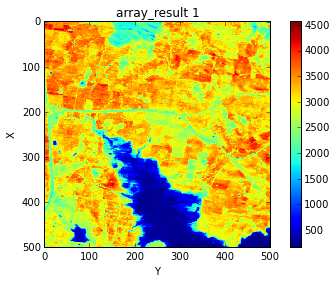

plot2D


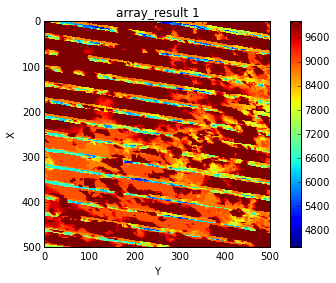

plot2D


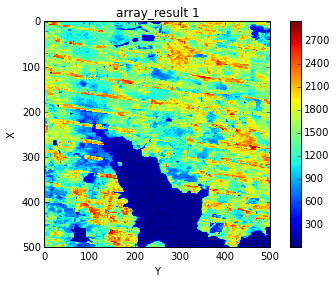

plot3D


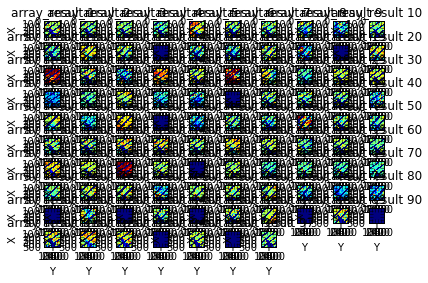

In [7]:
plot(resultMedian)
plot(resultMax)
plot(resultMin)
plot(e.cache['get_data'])

In [8]:

print("-----------------Resultado: --------------------------------")
pprint(e.cache['get_data']['array_result'].values()[0])


-----------------Resultado: --------------------------------
array([[[ 3837.,  3941.,  3941., ...,  2452.,  2452.,  2698.],
        [ 3837.,  3871.,  3906., ...,  2487.,  2487.,  2768.],
        [ 3837.,  3871.,  3906., ...,  2557.,  2557.,  2838.],
        ..., 
        [ 3078.,  2903.,  2728., ...,   397.,   398.,   433.],
        [ 2833.,  2798.,  2763., ...,   397.,   433.,   433.],
        [ 2658.,  2588.,  2553., ...,   397.,   398.,   433.]],

       [[ 3642.,  3717.,  3755., ...,  2284.,  2284.,  2513.],
        [ 3717.,  3755.,  3831., ...,  2437.,  2437.,  2704.],
        [ 3717.,  3755.,  3868., ...,  2513.,  2513.,  2819.],
        ..., 
        [ 3157.,  3081.,  2967., ...,   162.,   123.,   123.],
        [ 3005.,  3043.,  3005., ...,   123.,   123.,   123.],
        [ 2624.,  2547.,  2433., ...,    84.,    84.,   123.]],

       [[ 3545.,  3505.,  3586., ...,  2285.,  2285.,  2655.],
        [ 3505.,  3586.,  3708., ...,  2408.,  2408.,  2860.],
        [ 3505.,  3586., 

#Exportar los resultados a Archivo

In [9]:
writeTXY_to_GeoTiff(e.cache['get_data'], "salida2.tiff")

In [10]:
writeToCSV(resultMedian, "salida2.csv")